In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

#Load and View
csv_file = "moviestop20percent.csv"
df = pd.read_csv(csv_file)
df.head()

,ID,title,number_of_votes,averageRating,year,runtimeMinutes
0,tt0111161,The Prisoner,2467229,9.3,1994,142
1,tt0468569,The Dark Knight,2421844,9.0,2008,152
2,tt1375666,Inception,2172818,8.8,2010,148
3,tt0137523,Fight Club,1942270,8.8,1999,139
4,tt0110912,Pulp Fiction,1910475,8.9,1994,154


<Figure size 720x576 with 0 Axes>

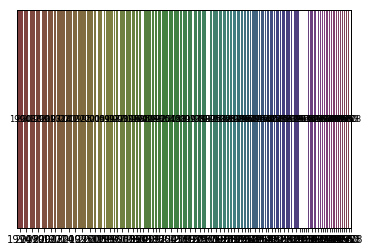

In [4]:
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 10.0
mosaic(df, ['year']);

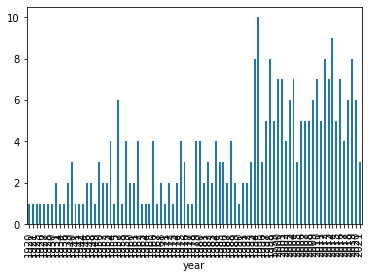

In [5]:

df.groupby('year').size().plot(kind='bar')

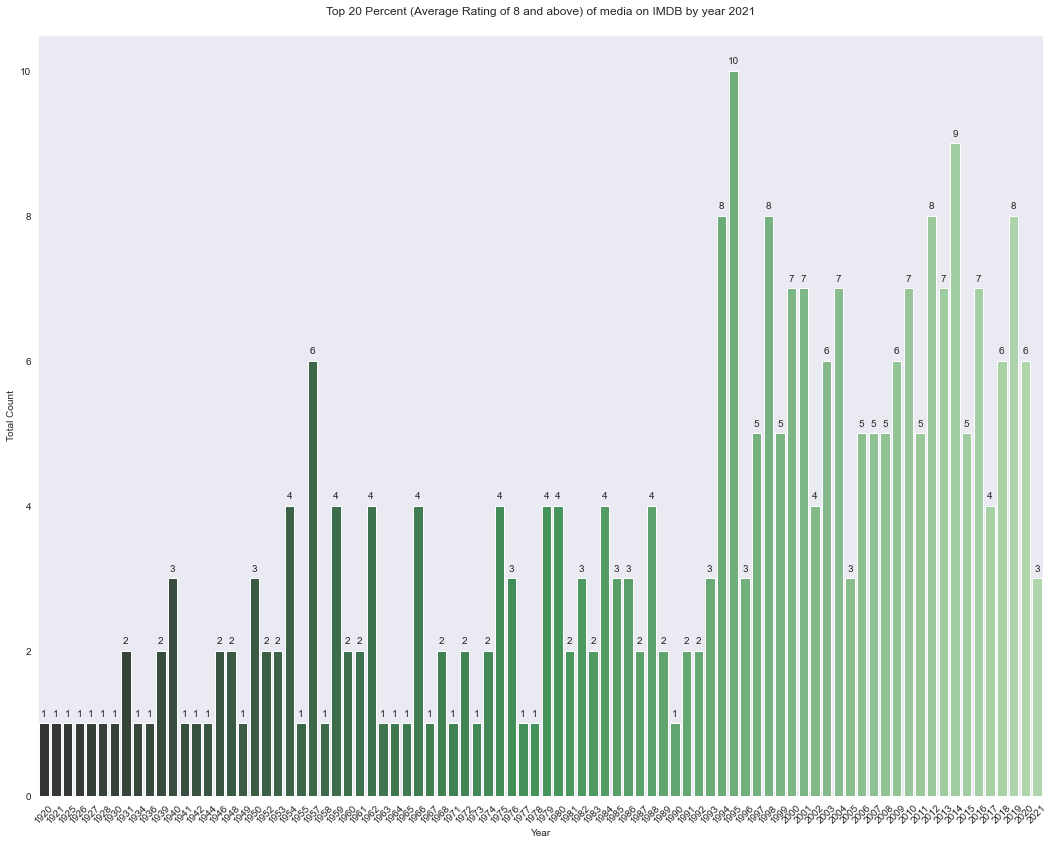

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.figure(figsize=(18, 14))

g = sns.countplot(x="year", data=df, palette="Greens_d")
sns.set_style("dark")
g.set(xlabel='Year', ylabel='Total Count')
plt.title("Top 20 Percent (Average Rating of 8 and above) of media on IMDB by year 2021",pad=20)
plt.xticks(rotation=45)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
fig = matplotlib.pyplot.figure()

plt.show(g)
#plt.savefig("sample.jpg")

In [18]:
#fig = px.bar(df, x='year', y='number_of_votes',orientation='h')

import plotly.express as px
fig = px.histogram(df, x="year")
fig.show()


In [20]:
import plotly.graph_objects as go
import plotly.express as px
fig = px.scatter(df,x='year',y='averageRating')
fig.show()


In [22]:
fig = px.scatter(df,x='year',y='averageRating',size='number_of_votes',color='averageRating', log_x=True, size_max=60)
fig.show()

fig = px.density_heatmap(df, x="year", y="averageRating",z="number_of_votes")
fig.show()

In [23]:
px.scatter(df, x="averageRating", y="number_of_votes",animation_frame="year", size="number_of_votes", color="averageRating")

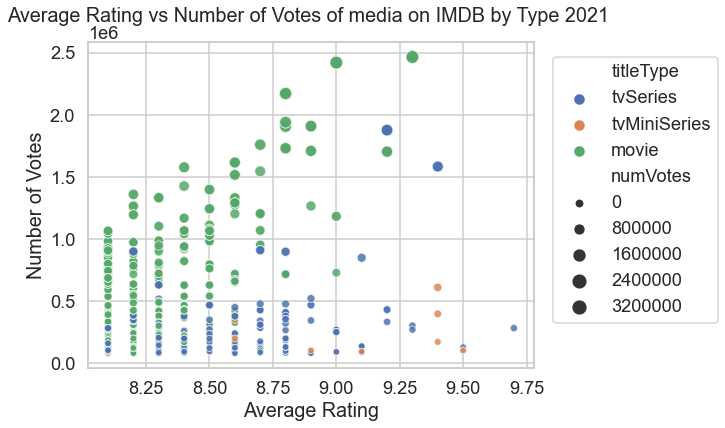

In [50]:
sns.set_context('talk', font_scale=1.1)
plt.figure(figsize=(8, 6))
sns.scatterplot(df.averageRating, df.numVotes, 
                size="numVotes",data=df,
                hue="titleType", 
                alpha=0.6, palette="deep")
plt.xlabel("Average Rating")
plt.ylabel("Number of Votes")
plt.title("Average Rating vs Number of Votes of media on IMDB by Type 2021 ", pad=20)
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0.8)
plt.show()

In [79]:
import pandas as pd

#Load and View
csv_file = "resultstop20percent.csv"
mycsv = pd.read_csv(csv_file)
mycsv.info()

df.sort_values('numVotes', ascending=False).head()
#mycsv = mycsv.melt(id_vars='numVotes',var_name='Column_name',value_name='Value')
#print(mycsv.set_index('Column_name').groupby('numVotes')['Value'].apply(lambda grp: grp.nlargest(2)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 8 columns):
titleId          1401 non-null object
title            1401 non-null object
region           1401 non-null object
language         1401 non-null object
numVotes         1401 non-null int64
averageRating    1401 non-null float64
genres           1401 non-null object
titleType        1401 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 87.7+ KB


In [116]:
df.sort_values('numVotes', ascending=False).drop_duplicates('title').drop(columns=['titleId','region']).head(10)

,title,language,numVotes,averageRating,genres,titleType
18,The Prisoner,en,2467229,9.3,Drama,movie
19,The Shawshank Redemption,en,2467229,9.3,Drama,movie
79,The Dark Knight,en,2421844,9.0,"Action,Crime,Drama",movie
171,Inception,en,2172818,8.8,"Action,Adventure,Sci-Fi",movie
151,Fight Club,en,1942270,8.8,Drama,movie
98,Pulp Fiction,en,1910475,8.9,"Crime,Drama",movie
141,Forrest Gump,en,1907240,8.8,"Drama,Romance",movie
37,Game of Thrones,en,1878330,9.2,"Action,Adventure,Drama",tvSeries
43,GoT,en,1878330,9.2,"Action,Adventure,Drama",tvSeries
212,The Matrix,en,1761346,8.7,"Action,Sci-Fi",movie


AttributeError: 'Table' object has no attribute 'set_table_styles'

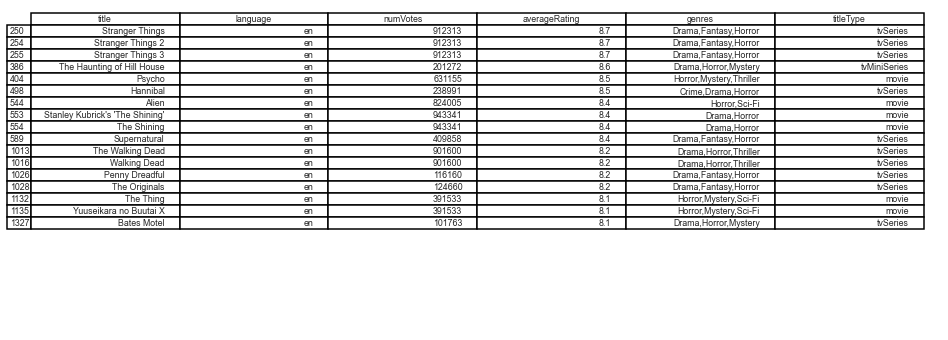

In [135]:
newdf = df.loc[df['genres'].isin(['Horror,Sci-Fi','Drama,Horror,Thriller','Horror,Mystery,Sci-Fi',
                                  'Drama,Horror','Crime,Drama,Horror','Drama,Horror,Mystery',
                                  'Drama,Fantasy,Horror','Horror,Mystery,Thriller'])].drop(columns=['titleId','region']).drop_duplicates('title')

import pandas as pd
import matplotlib.pylab as plt
from pandas.plotting import table

# set fig size
fig, ax = plt.subplots(figsize=(16, 6)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, newdf, loc='upper right')  

headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}

tab.set_table_styles([headers])

# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(8) 
# save the result
plt.savefig('table.png')

#from IPython.display import display, HTML
#display(HTML(newdf.to_html()))

In [83]:
df.genres.unique()

array(['Drama', 'Biography,Crime,Drama', 'Documentary',
       'Action,Drama,History', 'Crime,Drama,Thriller',
       'Drama,History,Thriller', 'Action,Adventure,Animation',
       'Crime,Drama', 'Action,Adventure,Drama',
       'Adventure,Animation,Comedy', 'Crime,Drama,Mystery',
       'Adventure,Comedy,Drama', 'Biography,Documentary,History',
       'Adventure,Drama,Sci-Fi', 'Action,Crime,Drama',
       'Animation,Crime,Drama', 'Biography,Drama,History', 'Comedy',
       'Comedy,History,News', 'Western', 'Comedy,Romance',
       'Drama,Romance', 'Comedy,Drama,Sport', 'Action,Adventure,Sci-Fi',
       'Drama,Sci-Fi,Thriller', 'Action,Animation,Comedy',
       'Action,Adventure,Fantasy', 'Animation,Comedy', 'Action,Sci-Fi',
       'Comedy,Drama', 'Drama,Mystery', 'Action,Biography,Drama',
       'Animation,Comedy,Drama', 'Drama,Fantasy,Horror',
       'Action,Drama,War', 'Drama,Family,Fantasy',
       'Action,Adventure,Mystery', 'Comedy,Drama,Romance',
       'Crime,Drama,Fantasy', 'D